## Support Vector Machines
* Poderosa metodologia para resolver problemas de aprendizagem de máquina.
* Proposto em 1995 pelo russo Vladimir Vapnik.
* Muito utilizado atualmente em diversos tipos de aplicações.
* O problema dos problemas não linearmente separáveis 
* O problema dos problemas não linearmente separáveis


![](https://i.ibb.co/tsDTKzn/SVM-Picture1.png)

* Problema não linearmente separável

### O processo de classificação:
  + Entendendo o parâmetro C, Soft Margin: 
    - A aplicação de um método puramente linear para classificar um conjunto de dados pode sofrer com dois problemas bastante comuns:
      - Outliers
      - Exemplos rotulados erroneamente
  + Mesmo assim o SVM ainda assim pode ser aplicado através do uso do parâmetro C (soft margin - variáveis de folga)
#### O truque do Kernel:
    - Realiza a projeção das características em um espaço multidimencional, maior que o vetor de entrada onde as classes podem ser separadas por um hiperplano.

![](https://i.ibb.co/n19dmvq/SVM-Picture2.png)

#### Vantagens:
  + Considerado o estado da arte dos classificadores.
  + Trabalha com problemas linearmente e não-linearmente separáveis.
  + Desempenho superior a maioria dos classificadores tradicionais.
  
#### Desvantagens:
  + A calibragem dos parâmetros envolvidos e escolha do tipo de kernel não é uma tarefa trivial.
  + O tempo de treinamento pode ser extremamente lento e computacionalmente complexo dependendo da quantidade de características.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 

from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn import svm
from sklearn.preprocessing import LabelEncoder

# Importe as bibliotecas de Pipelines e Pré-processadores
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Importa o pacote OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

import sys

## 1) Importando os dados já tratados sem OneHotEncoding:

In [3]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/datasets"
data = pd.read_csv('/content/drive/My Drive/datasets/dados_clust_v2.csv',sep=',') # faz a leitura dos dados

# data = pd.read_csv("/Users/andrerodrigues/Google Drive/FIAP-MBA 8IA/006 - Modelos de IA e ML/Trabalho_Final_2/Exercicio8_v2/dados_clust_v2.csv", sep =",")

data = data.iloc[:,1:]
data.head()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
 Consumo_cerveja.csv   data_ohe_nostd_v2.csv   opsd_germany_daily.csv
 dados_clust_v2.csv    ex1data1.txt	      'TrabalhoEx8(1).csv'
 data_nostd_v2.csv     house_prices.csv


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,dbscan,kmeans,som
0,-122.23,452600.0,129,41,880,3,126,322,83.252,37.88,1,3,1
1,-122.22,358500.0,1106,21,7099,3,1138,2401,83.014,37.86,0,2,2
2,-122.24,352100.0,190,52,1467,3,177,496,72.574,37.85,1,3,1
3,-122.25,341300.0,235,52,1274,3,219,558,56.431,37.85,1,1,1
4,-122.25,342200.0,280,52,1627,3,259,565,38.462,37.85,1,1,1


## 2) Importando os dados já tratados com OneHotEncoding:

In [4]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/datasets"
data_ohe = pd.read_csv('/content/drive/My Drive/datasets/data_ohe_nostd_v2.csv',sep=',') # faz a leitura dos dados

# data_ohe = pd.read_csv("/Users/andrerodrigues/Google Drive/FIAP-MBA 8IA/006 - Modelos de IA e ML/Trabalho_Final_2/Exercicio8_v2/data_ohe_nostd_v2.csv", sep =",")

data_ohe = data_ohe.iloc[:,1:]
data_ohe["dbscan"] = data["dbscan"]
data_ohe["kmeans"] = data["kmeans"]
data_ohe["som"] = data["som"]
data_ohe.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Consumo_cerveja.csv   data_ohe_nostd_v2.csv   opsd_germany_daily.csv
 dados_clust_v2.csv    ex1data1.txt	      'TrabalhoEx8(1).csv'
 data_nostd_v2.csv     house_prices.csv


,0,1,2,3,4,6,7,8,9,10,11,12,13,14,dbscan,kmeans,som
0,-122.23,452600.0,129.0,41.0,880.0,126.0,322.0,83.252,37.88,0.0,0.0,0.0,1.0,0.0,1,3,1
1,-122.22,358500.0,1106.0,21.0,7099.0,1138.0,2401.0,83.014,37.86,0.0,0.0,0.0,1.0,0.0,0,2,2
2,-122.24,352100.0,190.0,52.0,1467.0,177.0,496.0,72.574,37.85,0.0,0.0,0.0,1.0,0.0,1,3,1
3,-122.25,341300.0,235.0,52.0,1274.0,219.0,558.0,56.431,37.85,0.0,0.0,0.0,1.0,0.0,1,1,1
4,-122.25,342200.0,280.0,52.0,1627.0,259.0,565.0,38.462,37.85,0.0,0.0,0.0,1.0,0.0,1,1,1


#### a) Apenas como curiosidade, vejamos como as classes estão distribuidas em 'dbscan', 'kmeans' e 'som'

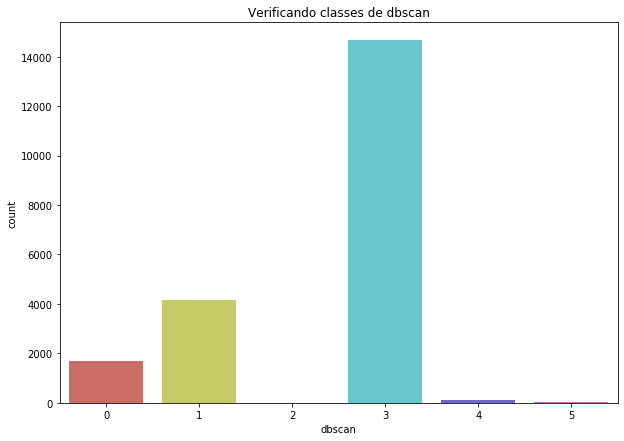

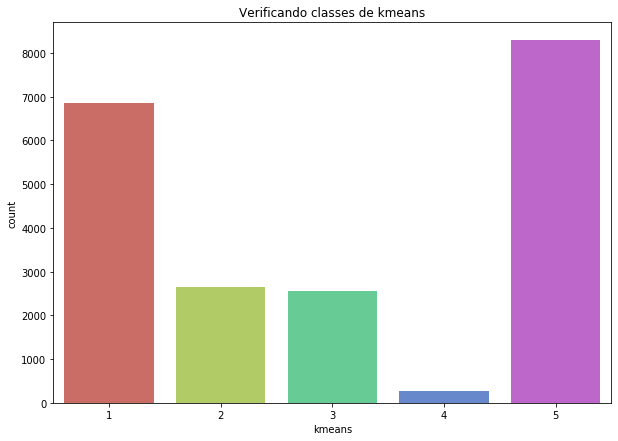

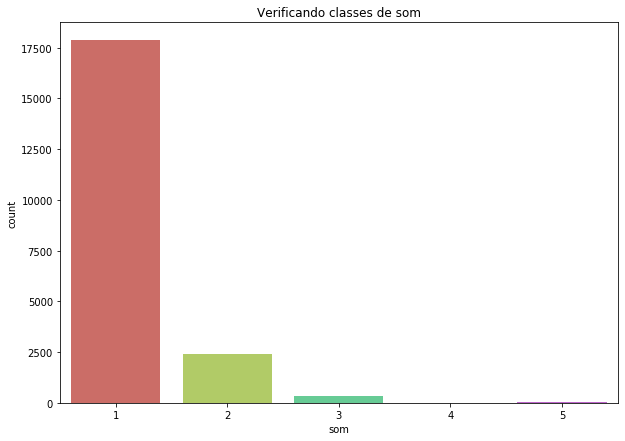

In [5]:
plt.figure(figsize=(10,7))
plot1 = sb.countplot(x='dbscan',data=data, palette='hls')
plt.title("Verificando classes de dbscan")
plt.show(plot1)
plt.figure(figsize=(10,7))
plot2 = sb.countplot(x='kmeans',data=data, palette='hls')
plt.title("Verificando classes de kmeans")
plt.show(plot2)
plt.figure(figsize=(10,7))
plot3 = sb.countplot(x='som',data=data, palette='hls')
plt.title("Verificando classes de som")
plt.show(plot3)

## 3) Seleciona o dataset para ser tratado pelo Modelo de Machine Learning e Separa as Classes

In [6]:
import traceback

def dataset_for_machine(dataset, target):
    
    # Tente receber o nome do arquivo
    try:
        d = dataset
        t = target
        
        
    
        if d == 'data':
            #No caso do DBSCAN, as amostras cujo o cluster for igual a 0, são consideradas outliers e não podemos considera-las como classe do problema.
            if t == 'dbscan':
                data.drop(data[data.dbscan == 0].index, inplace=True)
            # Troca o nome do dataset para df. A partir desse ponto, o dataset para ser tratado pelo modelo de ML será conhecido por df.
            df = data
            # Separa a classe
            classes = df[t]
            df.drop(columns=['dbscan','kmeans', 'som'], axis=1, inplace=True)


        elif d == 'data_ohe':
            #No caso do DBSCAN, as amostras cujo o cluster for igual a 0, são consideradas outliers e não podemos considera-las como classe do problema.
            if t == 'dbscan':
                data.drop(data[data.dbscan == 0].index, inplace=True)
            # Troca o nome do dataset para df. A partir desse ponto, o dataset para ser tratado pelo modelo de ML será conhecido por df.
            df = data_ohe
            # Separa a classe
            classes = df[t]
            df.drop(columns=['dbscan','kmeans', 'som'], axis=1, inplace=True)

        else:
            print("Escolha entre 'data' ou 'data_ohe'")
            exit

    # Se ocorrer um erro
    except:
        # Mostre na tela
        trace = traceback.format_exc()
        print ('Aconteceu um erro:\n', trace)
        # Encerre o programa
        raise SystemExit
        
    return df, classes
    
# df, classes = dataset_for_machine(input("Entre com o dataset que será tratado pela maquina('data' ou 'data_ohe') e o target('kmeans' ou 'som') separados por ',':"))
dataset = input("Entre com o dataset que será tratado pela maquina('data' ou 'data_ohe'):")
target = input("Entre com o target que será tratado pela maquina ('dbscan','kmeans' ou 'som'):")
df, classes = dataset_for_machine(dataset, target)

Entre com o dataset que será tratado pela maquina('data' ou 'data_ohe'):data
Entre com o target que será tratado pela maquina ('dbscan','kmeans' ou 'som'):dbscan


* A partir desse ponto, o dataset para ser tratado pelo modelo de ML será conhecido por df. A seleção se ele vai ser passado com ou sem One Hot Encoding foi feita acima.

In [7]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,-122.23,452600.0,129,41,880,3,126,322,83.252,37.88
2,-122.24,352100.0,190,52,1467,3,177,496,72.574,37.85
3,-122.25,341300.0,235,52,1274,3,219,558,56.431,37.85
4,-122.25,342200.0,280,52,1627,3,259,565,38.462,37.85
5,-122.25,269700.0,213,52,919,3,193,413,40.368,37.85


In [8]:
classes

0        1
2        1
3        1
4        1
5        1
        ..
20635    3
20636    3
20637    3
20638    3
20639    3
Name: dbscan, Length: 18959, dtype: int64

## 4) Faz a validação via crossvalidation (k-fold)

In [0]:
def Acuracia(clf,X,y):
    resultados = cross_val_predict(clf, X, y, cv=5)
    return metrics.accuracy_score(y,resultados)

## 5) Pre-processamento de dados

In [0]:
# def remove_features(lista_features):
#     for i in lista_features:
#         data.drop(i, axis=1, inplace=True)
#     return 0

## 9) Support Vector Machines 
#### a) Preparando os pipes com as configurações do parâmetro C, Kernel e Normalização dos dados.

In [0]:
pip_1 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC())
])

pip_2 = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('clf', svm.SVC())
])

pip_3 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='rbf'))
])

pip_4 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='poly'))
])

pip_5 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='linear'))
])

#### b) Teste com apenas LabelEncoder na coluna 'classes' usando o pipeline 'pip_1'

In [12]:
Acuracia(pip_1,df,classes)

0.9998417638061079

#### c) Teste com apenas LabelEncoder na coluna 'classes' usando o pipeline 'pip_2'

In [13]:
Acuracia(pip_2,df,classes)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

0.9987341104488633

#### d) Testando Kernels 
##### Kernel rbf

In [14]:
Acuracia(pip_3,df,classes)

0.9998417638061079

##### Kernel Polynomial

In [15]:
Acuracia(pip_4,df,classes)

0.9996307822142518

##### Kernel Linear

In [16]:
Acuracia(pip_5,df,classes)

0.9996835276122158

## 9) GridSearch

In [0]:
from sklearn.model_selection import GridSearchCV

lista_C = [0.001, 0.01, 0.1, 1, 10,100]
lista_gamma = [0.001, 0.01, 0.1, 1, 10, 100]

In [0]:
parametros_grid = dict(clf__C=lista_C, clf__gamma=lista_gamma)

#### a) Faz o tuning dos parametros testando cada combinação utilziando CrossValidation com 10 folds e analisando a acurácia

In [0]:
grid = GridSearchCV(pip_3, parametros_grid, cv=10, scoring='accuracy')

In [20]:
grid.fit(df,classes)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
               

In [21]:
grid.cv_results_

{'mean_fit_time': array([  8.00395961,   7.92052195,   7.59039946,   8.03924963,
          6.2875391 ,  11.65778422,   7.96101527,   5.27742054,
          2.99198067,   8.13331356,  24.41937344,  26.47872896,
          4.7242985 ,   1.17442274,   0.8319217 ,   8.19864237,
         45.41862149,  49.2047981 ,   1.09250233,   0.31035051,
          0.50909784,  11.41131761,  84.76434164,  89.21154323,
          0.37050855,   0.20139194,   0.4354465 ,  11.54423773,
         90.85552049, 112.47563426,   0.24394531,   0.23660128,
          0.43493547,  11.57846098,  90.37020173, 112.51216021]),
 'mean_score_time': array([0.57353094, 0.57451167, 0.56918175, 0.58084934, 0.5974808 ,
        0.75862882, 0.56704614, 0.42643604, 0.2529186 , 0.6021693 ,
        1.2271698 , 1.19670203, 0.3897316 , 0.09957545, 0.06758373,
        0.40488524, 1.25621736, 1.21757977, 0.09062192, 0.02456427,
        0.02870059, 0.28310554, 1.25752904, 1.26249368, 0.02235174,
        0.00960329, 0.0247555 , 0.28199663, 1.

In [22]:
grid.best_params_

{'clf__C': 10, 'clf__gamma': 0.1}

In [23]:
grid.best_score_

1.0

#### b) Métricas de Avaliação de Modelos

In [0]:
pip_6 = Pipeline([
('scaler',StandardScaler()),
('clf', svm.SVC(kernel='rbf',C=10,gamma=0.1))
])

In [0]:
resultados = cross_val_predict(pip_6, df, classes, cv=10)

In [31]:
c_names = [str(i) for i in np.unique(classes)]
print (metrics.classification_report(classes,resultados,target_names=c_names))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4174
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00     14655
           4       1.00      1.00      1.00       106
           5       1.00      1.00      1.00        14

    accuracy                           1.00     18959
   macro avg       1.00      1.00      1.00     18959
weighted avg       1.00      1.00      1.00     18959

